In [1]:
# %load_ext autoreload
# %autoreload 2

# Rhine level prediction

Predict the rhine level in Bonn.

[Feedback link for this task](https://beta.ins.uni-bonn.de/feedback/mllab?obj=Rhinelevel)

Source for the data:

    Wasserstraßen- und Schifffahrtsverwaltung des Bundes (WSV),
    bereitgestellt durch die Bundesanstalt für Gewässerkunde (BfG).

which (unofficially) translates to

    German Federal Waterways and Shipping Administration (WSV),
    provided by the German Federal Institute of Hydrology (BfG).

You may need to install additional packages. This can be done using the following command:

In [2]:
!pip install -r mllab/rhinelevel/requirements.txt
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [3]:
import pandas as pd
import numpy as np
from mllab.rhinelevel import wsv, dwd
CACHE = './cache'

The dataset is expected to be stored in the folder `data` relative to this notebook.

In [4]:
levels = wsv.RiverLevelData('data/riverlevels.tar.bz2', CACHE)

We plot the stations in a map. This might need a restart of Jupyter in order to work.

In [5]:
import ipyleaflet as leaf
m = leaf.Map(center=(50.2, 7.5), zoom=7, basemap=leaf.basemaps.Hydda.Full)
markers = []
for station in levels.stations():
    title = "{}, river km {}, zero points over sea {}".format(station.name, station.river_km, station.zero)
    m += leaf.Marker(location=station.pos, draggable=False, title=title)
m

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

Collect the station data into a Pandas DataFrame

In [6]:
#df = levels.to_frame()
#df[300000:300100]

In [7]:
#df.to_csv("rhineset.csv")

In [8]:
df = pd.read_csv("rhineset.csv", index_col=0)
df[300000:300100]

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
1989-07-22 23:15:00+00:00,198.0,134.0,228.0,153.0,179.0,165.0,165.0,133.0,252.0,169.0,150.0,121.0,178.0,324.0,160.0
1989-07-22 23:30:00+00:00,198.0,134.0,228.0,152.0,179.0,164.0,165.0,133.0,253.0,169.0,150.0,115.0,178.0,324.0,160.0
1989-07-22 23:45:00+00:00,198.0,133.0,228.0,152.0,179.0,164.0,165.0,133.0,253.0,169.0,150.0,112.0,178.0,324.0,160.0
1989-07-23 00:00:00+00:00,198.0,133.0,228.0,152.0,179.0,164.0,165.0,133.0,254.0,169.0,150.0,109.0,178.0,324.0,160.0
1989-07-23 00:15:00+00:00,198.0,133.0,228.0,152.0,179.0,165.0,165.0,133.0,254.0,169.0,150.0,107.0,179.0,324.0,160.0
1989-07-23 00:30:00+00:00,198.0,133.0,227.0,152.0,179.0,164.0,165.0,133.0,255.0,169.0,150.0,109.0,179.0,324.0,160.0
1989-07-23 00:45:00+00:00,198.0,133.0,227.0,151.0,179.0,164.0,165.0,133.0,255.0,169.0,150.0,112.0,180.0,324.0,160.0
1989-07-23 01:00:00+00:00,199.0,133.0,227.0,153.0,180.0,163.0,165.0,133.0,253.0,169.0,150.0,113.0,180.0,324.0,159.0
1989-07-23 01:15:00+00:00,199.0,133.0,227.0,156.0,180.0,163.0,165.0,133.0,250.0,168.0,150.0,112.0,180.0,324.0,159.0
1989-07-23 01:30:00+00:00,199.0,133.0,227.0,159.0,180.0,163.0,165.0,134.0,250.0,168.0,150.0,113.0,180.0,324.0,159.0


### Pandas info

The DataFrame `df` is index by a time series, see the [documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) for more details.

To get a NumPy array just run `df.as_matrix()`. You can select which columns you want by

```python
df[['Worms', 'Kaub']].as_matrix()
```

## Remarks

- Not all stations start at the same time, in this case there are `NaN` values.
- Also, there were some failures in which case there is also a `NaN` stored.
    - The [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) might be helpful.
- You might want to select a subset of available stations at the beginning (pick reasonable ones)
    - The flow speed of the river is at around 7km/h, this varies, though. Hover over the map markers to see how far the stations are apart
- You can also check how far you can make predictions into the future
- A wavelet transformation could be interesting as a feature map, check out [PyWavelet](https://pywavelets.readthedocs.io/en/latest/)

## Real-time prediction

If you are interested in this, you can get real time measurements for the stations by using

```python
df = levels.to_frame(recent=True)
```

This will return a dataframe with measurements from the last 30 days, also in 15 minute intervals.

Zu Beginn droppe ich alle Zeilen mit NaN-Werten

In [9]:
no_NaN_df = df.dropna()

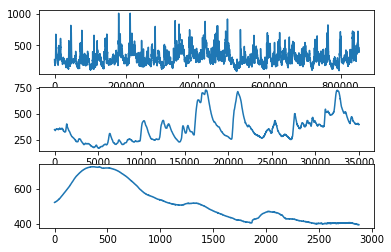

In [10]:
import matplotlib.pyplot as plt # bei mir muss man das 2-mal laufen lassen damit die plots kommen
%matplotlib inline

Bonn = no_NaN_df[['Bonn']].values
fig, ax = plt.subplots(3,1)
#plt.subplot(Bonn[-200000:,0])
ax[0].plot(np.arange(0, len(Bonn[:,0])), Bonn[:,0]) # gesamte Daten 1989-2013
ax[1].plot(np.arange(0, len(Bonn[-35040:,0])), Bonn[-35040:,0]) # Daten 2013
ax[2].plot(np.arange(0, len(Bonn[-2880:,0])), Bonn[-2880:,0]) # Daten von einem Monat in 2013

Rein intuitiv sollte man recht gut den Pegel des Flusses in naher Zukunft vorhersagen können, wenn man die Daten von Flussaufwärts hat. Also schaue ich mir als erstes die Autokovarianzfunktion an.

In [11]:
# Daten nach Jahr Aufteilen
yearly_data = []
for i in range(1989, 2013):
    yearly_data.append(no_NaN_df.loc[str(i) + '-01-01 00:00:00+00:00': str(i) + '-12-31 23:45:00+00:00',:])

Text(0.5, 0, 'Jahresverlauf')

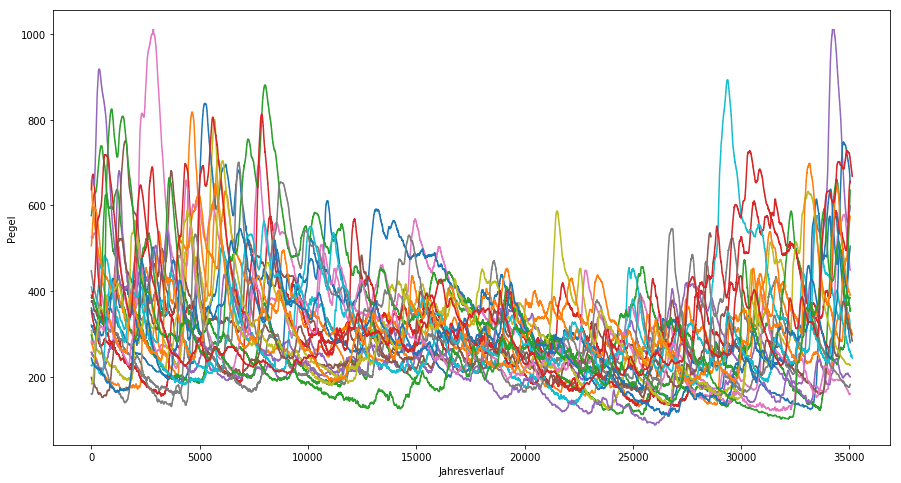

In [12]:
# zumindest ab Eintrag yearly_data[9] sind Daten vollständig
# plotte daten
fig = plt.figure(figsize=(15,8))
for i in range(0, 24):
    plt.plot(np.arange(0, len(yearly_data[i])), yearly_data[i]['Bonn'])
  
plt.ylabel('Pegel')
plt.xlabel('Jahresverlauf')


In [13]:
# Vollständigkeit der Daten innerhalb Jahre prüfen
yearly_data_size = np.zeros(24)
for i in range(0, 24):
    yearly_data_size[i] = yearly_data[i].shape[0]
yearly_data_size

array([35040., 35040., 35040., 34080., 35037., 28611., 35040., 32160.,
       32064., 35040., 35040., 35136., 35040., 35040., 35040., 35136.,
       35040., 35040., 35040., 35135., 35040., 35040., 35040., 35136.])

In [14]:
# differencing Daten um eine stationäre Zeitreihe zu bekommen(oder nicht)
differenced_Bonn = np.diff(Bonn[::48], n=1, axis=0) # daten in 12 Stunden Rhythmus

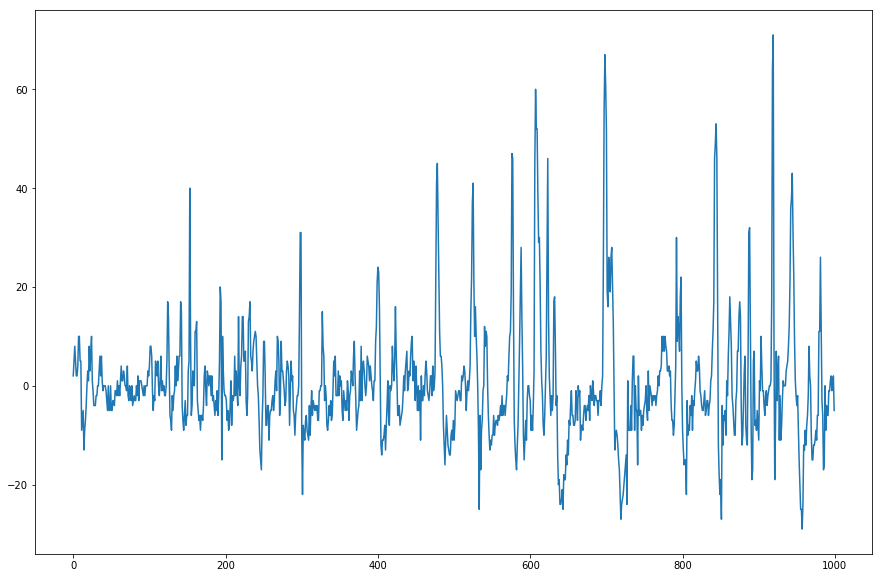

In [15]:
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(0, 1000), differenced_Bonn[-1000:])

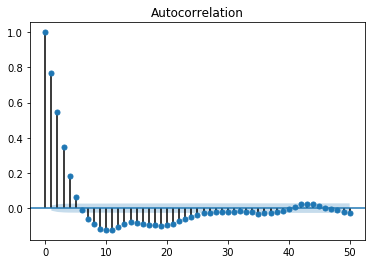

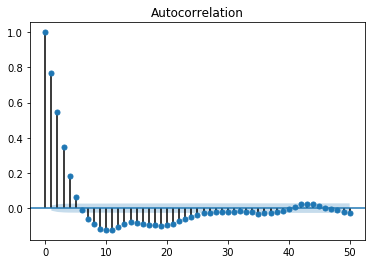

In [16]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(differenced_Bonn, lags=50)

Mittelwert verändert sich etwas innerhalb des Jahres, Varianz verändert sich stark innerhalb des Jahres. Ansonsten keine klare jahresübergreifende Struktur. => Lange vorhersagen sind wahrscheinlich schwierig.

In [17]:
"""
Erster Vorhersage versuch: ARIMA Modell mit ausschließlich den Daten aus Bonn (Das ist analog zu OLS Regression mit ARIMA
verteilten Residuen)
"""
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(differenced_Bonn, order=(0,0,3)) # das ::4 bedeutet man nimmt jeden vierten Eintrag, also Stündlich Daten
model_fit = model.fit()

In [18]:
model_fit.params

array([0.00607368, 0.79511647, 0.55039338, 0.25915406])

In [19]:
def arima_model(dataset, arima_order): # dataset als 1d-array und arima_order 3-tuple (p,d,q)
    train_set_size = int(len(dataset*0.7))
    train = dataset[:train_set_size]
    test = dataset[train_set_size:]
    history = [x for x in train] # hier werden nach und nach die benutzten testsets angehängt
    #prediction
    prediction = list()
    for t in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit(disp=0)
        single_prediction = model.fit.forecast()[0]
        prediction.append(single_prediction)
        history.append(test[t])
    error = mean_squared_error(test, prediction)
    return error

In [20]:
#arima_model(differenced_Bonn, (0,0,3))

model = sm.tsa.statespace.SARIMAX(Bonn[-35040::4,0], trend = 'c', order = (0,0,1))
model_fit = model.fit()

print(model_fit.summary())

In [21]:
"""
Zweiter Versuch: Lineare regression
Verbesserungsmöglichkeiten: 
++Bessere/mehr Variablen einbauen(von Mehr Stationen/mehr Zeitschritten/höhere Ableitungen)
++PCA oder Autoencoder oder so zur Dimensionsreduktion
+AIC oder BIC zum bestimmen der Anzahl Variablen
-adjusted R squared einbauen
+Crossvalidation anstatt einfachen Train-Test-Split
+Residuen als Zeitreihe Modellieren
-homoskedastizität hinbekommen(bin eher dafür, es so zu lassen)
-Poissonregression (mathematisch korrekter, wird aber keinen Unterschied machen)
"""

from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
"""
Als unabhängige Variablen nehmen wir: 
-Messwerte von den Stationen 12 Stunden davor
-1.Ableitung von ein paar Stationen
"""
no_NaN_df_subdata = no_NaN_df[['Bonn', 'Kaub', 'Kalkofen Neu', 'Koblenz Up', 'Andernach']].values
# no_NaN_df_subdata = no_NaN_df_subdata[::4,:] # erstmal reduzieren auf stündliche Daten
differenced_no_NaN_df_subdata = np.diff(no_NaN_df_subdata, n=1, axis=0)

In [27]:
# Erstelle einzelne Datenpunkte
independent_variable = np.c_[differenced_no_NaN_df_subdata[:-48], no_NaN_df_subdata[1:-48,:]] # verknüpfen

dependent_variable = no_NaN_df[['Bonn']].values
"""
Zielvariable anpassen. Der erste Datenpunkt fällt weg wegen der Differenzierung 
und 48 weitere wegen dem Vorhersageintervall von 12 Stunden.
"""
dependent_variable_reduced = dependent_variable[49:]

In [28]:
differenced_no_NaN_df_subdata # Differenz sehr grob

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1.],
       ...,
       [ 1.,  0.,  0., -1., -1.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.]])

In [29]:
"""
gewöhnlicher Train-Test Split
Rauskommentiert weil: Für Zeitreihen braucht man ne spezielle Version von Train-Test Split
"""
#independent_variable_train, independent_variable_test, dependent_variable_train, dependent_variable_test = train_test_split(independent_variable, dependent_variable, test_size= 0.33, random_state = 11)

'\ngewöhnlicher Train-Test Split\nRauskommentiert weil: Für Zeitreihen braucht man ne spezielle Version von Train-Test Split\n'

In [30]:
"""
Random Subsets für Train-Test Split
Rauskommentiert weil: Für Zeitreihen sollte man keine random subsets als Train-Test Split benutzen
"""
#np.random.seed(12)
#shuffled_indices = np.arange(dependent_variable_reduced.shape[0])
#np.random.shuffle(shuffled_indices)

#splitpoint_between_test_and_train = int(len(shuffled_indices)*0.7)
#shuffled_indices_train = shuffled_indices[:splitpoint_between_test_and_train]
#shuffled_indices_test =  shuffled_indices[splitpoint_between_test_and_train:]

#independent_variable_train = independent_variable[(shuffled_indices_train)]
#dependent_variable_train = dependent_variable_reduced[(shuffled_indices_train)]
#independent_variable_test = independent_variable[(shuffled_indices_test)]
#dependent_variable_test = dependent_variable_reduced[(shuffled_indices_test)]

'\nRandom Subsets für Train-Test Split\nRauskommentiert weil: Für Zeitreihen sollte man keine random subsets als Train-Test Split benutzen\n'

In [41]:
#timeseriessplit model

from sklearn.model_selection import TimeSeriesSplit

number_splits = 20
ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(independent_variable):
    #create train and test set
    independent_variable_train = independent_variable[train_index]
    independent_variable_test = independent_variable[test_index]
    dependent_variable_train = dependent_variable_reduced[train_index]
    dependent_variable_test = dependent_variable_reduced[test_index]
    #fit linear regression model
    reg = LinearRegression(fit_intercept=True, normalize =True)
    regression_model_fit = reg.fit(independent_variable_train, dependent_variable_train)
    #prediction on test set
    prediction_regression_model=reg.predict(independent_variable_test)
    print(np.sum(((prediction_regression_model-dependent_variable_test)**2))/dependent_variable_test.size)

72.37358615665077
33.807406308207455
39.270215937144194
141.90279258403172
90.96801867924749
44.27914974001818
38.73031201220916
88.8557262326016
58.454592013926366
70.46671794170817
139.46628701596134
22.944067484722215
29.06654522789877
32.47067348281539
38.88341953247548
25.813118511349234
26.430014392580752
84.3138478720972
35.90002233705752
42.661553721531824


In [83]:
# vergleich mit einfachem Modell, in dem die Vorhersage vom Pegel der aktuelle Wert ist
vergleichsmodell = dependent_variable[-len(dependent_variable_test):]-dependent_variable[-len(dependent_variable_test)-48:-48]
loss_vergleichsmodell = sum(np.square(vergleichsmodell))/len(vergleichsmodell)
loss_prediction = sum(np.square(residuals_regression))/len(residuals_regression)
loss_vergleichsmodell

array([165.9248341])

In [84]:
"""
Rauskommentiert weil: Wir machen das im timeserissplit Fenster
"""
#regression_model = LinearRegression(fit_intercept=True, normalize =True)
#regression_model_fit = regression_model.fit(independent_variable_train, dependent_variable_train)

'\nRauskommentiert weil: Wir machen das im timeserissplit Fenster\n'

In [85]:
regression_model_fit.intercept_

array([34.23389788])

In [86]:
regression_model_fit.coef_ # Reihenfolge: 'Bonn', 'Kaub', 'Kalkofen Neu', 'Koblenz Up', 'Andernach'

array([[ 1.83051264,  0.8375081 ,  0.40616369,  0.58176923,  1.06225053,
        -0.008643  ,  0.27698782,  0.11476279,  0.24306209,  0.48472173]])

In [87]:
prediction_regression_model = regression_model_fit.predict(independent_variable_test)
residuals_regression = dependent_variable_test-prediction_regression_model

In [88]:
len(dependent_variable_test)

40537

Text(0, 0.5, 'Residuum')

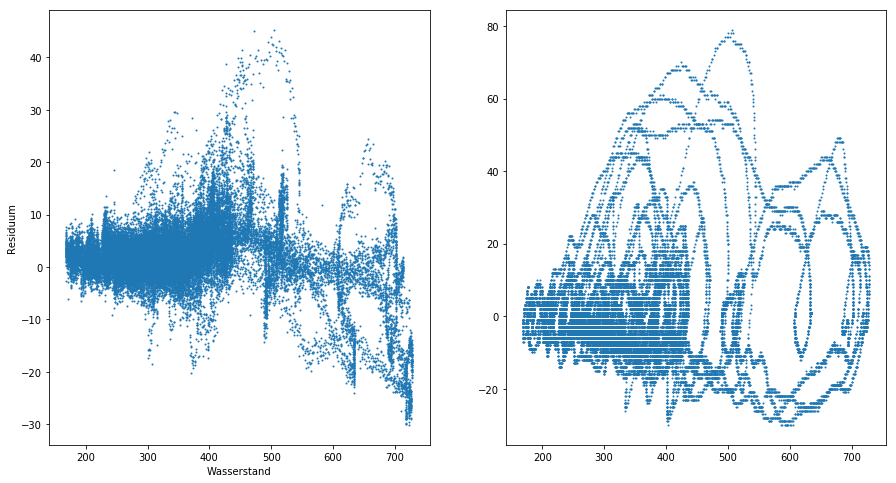

In [89]:
# plotte residuen
fig, ax = plt.subplots(1,2, figsize = (15, 8))
ax[0].scatter(dependent_variable_test, residuals_regression, s = 1)
ax[1].scatter(dependent_variable_test, vergleichsmodell, s = 1)
ax[0].set_xlabel('Wasserstand')
ax[0].set_ylabel('Residuum')

Text(0, 0.5, 'vorhergesagter Wasserstand')

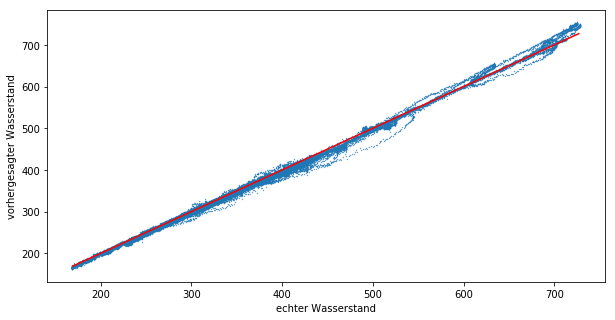

In [90]:
# plot echte Daten <=> Predictions
from matplotlib.pyplot import figure
figure(figsize = (10,5))
plt.scatter(dependent_variable_test, prediction_regression_model, s = 0.1)
plt.plot(np.arange(min(dependent_variable_test), max(dependent_variable_test)), 
         np.arange(min((dependent_variable_test)), max(dependent_variable_test)), c = 'red')
plt.xlabel('echter Wasserstand')
plt.ylabel('vorhergesagter Wasserstand')

Datenindex: 1361 von 39537


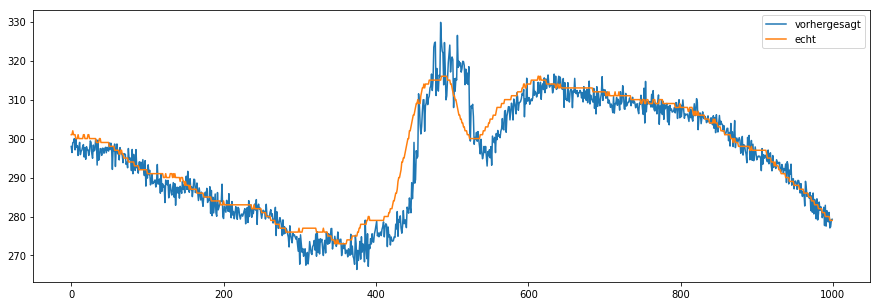

In [92]:
# plot echte Zeitreihe <=> vorhergesagte Zeitreihe
k = 1000 # Länge vom geplotteten Intervall
zuf_ausschnitt = np.random.randint(0,len(residuals_regression)-k)
figure(figsize = (15,5))
vorhergesagt = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'vorhergesagt')
echt = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                dependent_variable_test[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], label = 'echt')
plt.legend()
print("Datenindex:",zuf_ausschnitt ,"von", len(residuals_regression)-k)